In [5]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
X_train=pd.read_csv("X_train.csv")
y_train=pd.read_csv("y_train.csv")
X_test=pd.read_csv("X_test.csv")
y_test=pd.read_csv("y_test.csv")

In [7]:
X_train=X_train.drop(['Unnamed: 0'],axis=1)
y_train=y_train.drop(['Unnamed: 0'],axis=1)
X_test=X_test.drop(['Unnamed: 0'],axis=1)
y_test=y_test.drop(['Unnamed: 0'],axis=1)

In [23]:
X_train.head()

,0,1,2,3,4,5,6,7,0.1,1.1,...,x10_Utility,x11_15 to 30,x11_8 to 15,x11_more than 30,x11_none,x12_8 to 15,x12_more than 30,x13_Internal,x14_Yes,x15_Yes
0,-0.614659,1.037376,-0.373730,-0.261633,-1.406622,-0.174106,1.347152,0.164773,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.934786,1.037376,0.528158,-1.188300,0.767580,-0.174106,1.347152,-1.081318,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.389381,-1.348142,0.036219,-0.583786,-0.319521,-0.174106,-1.333321,-1.081318,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.160063,-1.348142,0.692138,-1.039925,1.419841,-0.174106,-1.333321,-1.081318,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.160063,0.242203,0.036219,-0.137763,-1.624042,-0.174106,0.453661,0.164773,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
y_train.head()

,FraudFound_P
0,0
1,0
2,0
3,0
4,0


In [49]:
y_train.value_counts()

FraudFound_P
0               10859
1               10859
dtype: int64

In [44]:
X_test.head()

,0,1,2,3,4,5,6,7,0.1,1.1,...,x10_Utility,x11_15 to 30,x11_8 to 15,x11_more than 30,x11_none,x12_8 to 15,x12_more than 30,x13_Internal,x14_Yes,x15_Yes
0,-0.614659,-0.552969,-1.111638,1.676004,1.419841,-0.174106,-0.439830,1.410865,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.160063,1.037376,0.118209,-0.989118,-0.536941,-0.174106,1.347152,-1.081318,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.709508,1.832548,-1.111638,-0.780270,0.550160,-0.174106,-1.333321,-1.081318,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.389381,-1.348142,-0.783679,-0.532529,-1.406622,-0.174106,0.453661,-1.081318,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.614659,-0.552969,-0.619699,1.565173,0.115319,-0.174106,0.453661,1.410865,5.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [45]:
y_test.head()

,FraudFound_P
0,0
1,0
2,0
3,0
4,0


In [46]:
y_test.value_counts()

FraudFound_P
0               3636
1                219
dtype: int64

In [8]:
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [9]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()

from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()

from sklearn.linear_model import SGDClassifier
model5 = SGDClassifier()

from sklearn.tree import DecisionTreeClassifier
model6 = DecisionTreeClassifier()


model_pipeline = [model1, model2, model3, model4, model5, model6]
model_names = ['Random Forest Classifier', 'Logistic Regression', 'KNN','Naïve Bayes','Stochastic Gradient Descent','Decision Tree Classifier']
scores = {}
for model, model_name in zip(model_pipeline, model_names):                     
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Random Forest Classifier': 0.9989410257356199, 'Logistic Regression': 0.757574327392909, 'KNN': 0.9038583287854676, 'Naïve Bayes': 0.6212826232514039, 'Stochastic Gradient Descent': 0.7503921977704644, 'Decision Tree Classifier': 0.9730177877738949}


In [ ]:
# Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

#some are the same parameterd like in decision tree
clf = RandomForestClassifier(max_depth=5,              #max number of questions
                             min_samples_split=20,     # amount of rows still considerd at every question
                             min_samples_leaf =20,     #ultimate answer based on at least this many rows
                             max_samples=0.8)   #fraction of x-train to use in each tree, better to try and use smaller values usually
                             
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


0.7693618196887374
0.6064850843060959


In [11]:
# Hyperparameter search:

from sklearn.model_selection import GridSearchCV


max_depth_choices=[2,7,13,15,20,25,30]          
min_samples_split=[2,7,13,15,20,25,30]    
min_samples_leaf =[2,7,13,15,20,25,30] 
max_samples=[0.2,0.8]

In [12]:
grid = {'max_depth': max_depth_choices,
        'min_samples_split': min_samples_split,
        'min_samples_leaf':min_samples_leaf,
        'max_samples': max_samples}

In [13]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid, cv = 5)

In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_samples=0.8,
                                              min_samples_leaf=20,
                                              min_samples_split=20),
             param_grid={'max_depth': [2, 7, 13, 15, 20, 25, 30],
                         'max_samples': [0.2, 0.8],
                         'min_samples_leaf': [2, 7, 13, 15, 20, 25, 30],
                         'min_samples_split': [2, 7, 13, 15, 20, 25, 30]})

In [15]:
grid_search.best_params_

{'max_depth': 30,
 'max_samples': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [43]:
# Random Forest Classifier after grid search:

from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(max_depth=30,              #max number of questions
                             min_samples_split=2,     # amount of rows still considerd at every question
                             min_samples_leaf =2,     #ultimate answer based on at least this many rows
                             max_samples=0.8)   #fraction of x-train to use in each tree, better to try and use smaller values usually
                             
clf.fit(X_train, y_train)

y_pred_rfc = clf.predict(X_test)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
display(confusion_matrix(y_test, y_pred_rfc))

from sklearn.metrics import accuracy_score

print("accuracy score:" , accuracy_score(y_test, y_pred_rfc))

from sklearn.metrics import f1_score
print("f1 scores:")
print(f1_score(y_test, y_pred_rfc, average='macro'))
print(f1_score(y_test, y_pred_rfc, average='weighted'))

print('auuracy:', accuracy_score(y_test,y_pred_rfc))
print('precision:', precision_score(y_test,y_pred_rfc))
print('recall:', recall_score(y_test,y_pred_rfc))

0.9996316419559812
0.9468223086900129


array([[3626,   10],
       [ 195,   24]], dtype=int64)

accuracy score: 0.9468223086900129
f1 scores:
0.5811161860278243
0.9280395122734374
auuracy: 0.9468223086900129
precision: 0.7058823529411765
recall: 0.1095890410958904


In [ ]:
# Decision Tree Classifier

In [41]:
dtree = DecisionTreeClassifier(max_depth=10,
                               max_features=None, min_samples_leaf=15)
dtree.fit(X_train,y_train)
y_pred_dtr = dtree.predict(X_test)
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))
display(confusion_matrix(y_test, y_pred_dtr))
print("accuracy score:" , accuracy_score(y_test, y_pred_dtr))

from sklearn.metrics import f1_score
print("f1 scores:")
print(f1_score(y_test, y_pred_dtr, average='macro'))
print(f1_score(y_test, y_pred_dtr, average='weighted'))

print('auuracy:', accuracy_score(y_test,y_pred_dtr))
print('precision:', precision_score(y_test,y_pred_dtr))
print('recall:', recall_score(y_test,y_pred_dtr))

0.8187217975872548
0.680674448767834


array([[2427, 1209],
       [  22,  197]], dtype=int64)

accuracy score: 0.680674448767834
f1 scores:
0.5200803994690602
0.7661565727667778
auuracy: 0.680674448767834
precision: 0.14011379800853485
recall: 0.8995433789954338


In [18]:
# Hyperparameter search:

max_depth_dtr=[3,10,None]             
min_samples_leaf_dtr =[2,5,7,10,15,20,30] 
max_features_dtr=[0.2,0.8,None]

In [19]:
grid = {'max_depth': max_depth_dtr,
        'min_samples_leaf':min_samples_leaf_dtr,
        'max_features': max_features_dtr}

In [20]:
grid_search = GridSearchCV(estimator = dtree, param_grid = grid, scoring='precision', cv = 5)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10,
                                              min_samples_leaf=15),
             param_grid={'max_depth': [3, 10, None],
                         'max_features': [0.2, 0.8, None],
                         'min_samples_leaf': [2, 5, 7, 10, 15, 20, 30]},
             scoring='precision')

In [22]:
grid_search.best_params_

{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2}

In [ ]:
# Decision Tree Classifier after grid search:

In [40]:
dtree = DecisionTreeClassifier(max_depth=None,
                               max_features=None, min_samples_leaf=2)
dtree.fit(X_train,y_train)
y_pred_dtr = dtree.predict(X_test)
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))
display(confusion_matrix(y_test, y_pred_dtr))
print("accuracy score:" , accuracy_score(y_test, y_pred_dtr))

from sklearn.metrics import f1_score
print("f1 scores:")
print(f1_score(y_test, y_pred_dtr, average='macro'))
print(f1_score(y_test, y_pred_dtr, average='weighted'))


print('auuracy:', accuracy_score(y_test,y_pred_dtr))
print('precision:', precision_score(y_test,y_pred_dtr))
print('recall:', recall_score(y_test,y_pred_dtr))

0.9970991804033521
0.9138780804150454


array([[3454,  182],
       [ 150,   69]], dtype=int64)

accuracy score: 0.9138780804150454
f1 scores:
0.6238803338427178
0.9166195657593037
auuracy: 0.9138780804150454
precision: 0.2749003984063745
recall: 0.3150684931506849


In [24]:
X=pd.read_csv("X.csv")

In [25]:
X=X.drop("Unnamed: 0", axis=1)

In [26]:
X

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15413,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15414,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15415,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15416,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [155]:
X.shape[1]

32

In [154]:
X_train.shape

(21718, 88)

In [34]:
# # ploting feature importance to know what effects my model the most

# def plot_feature_importances(model):
#     n_features = X.shape[1]
#     plt.barh(range(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), X.columns)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.rcParams["figure.figsize"] = (20, 42)

# plot_feature_importances(dtree)

In [33]:
# from matplotlib import pyplot
# # get importance
# importance = dtree.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [27]:
# Ploting the first 20 features
def plot_features(columns, importances, n=20):
    df_feat = (pd.DataFrame({"features":columns,
                             "features_importances": importances})
          .sort_values("features_importances",ascending=False)
          .reset_index(drop=True))
    
    # Plot:
    fig, ax = plt.subplots(figsize=(12,7))
    ax.barh(df_feat["features"][:n], df_feat["features_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features Importance")
    ax.invert_yaxis()

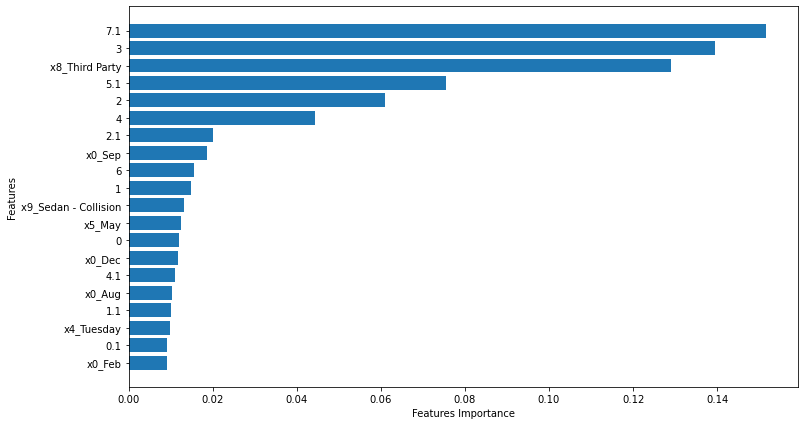

In [29]:
plot_features(X_train.columns, dtree.feature_importances_)

In [32]:
display(X_train.columns)
display(X.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '0.1', '1.1', '2.1', '3.1',
       '4.1', '5.1', '6.1', '7.1', 'x0_Aug', 'x0_Dec', 'x0_Feb', 'x0_Jan',
       'x0_Jul', 'x0_Jun', 'x0_Mar', 'x0_May', 'x0_Nov', 'x0_Oct', 'x0_Sep',
       'x1_Monday', 'x1_Saturday', 'x1_Sunday', 'x1_Thursday', 'x1_Tuesday',
       'x1_Wednesday', 'x2_Chevrolet', 'x2_Dodge', 'x2_Ford', 'x2_Honda',
       'x2_Luxus car', 'x2_Mazda', 'x2_Mercury', 'x2_Nisson', 'x2_Pontiac',
       'x2_Saab', 'x2_Saturn', 'x2_Toyota', 'x2_VW', 'x3_Urban', 'x4_Monday',
       'x4_Saturday', 'x4_Sunday', 'x4_Thursday', 'x4_Tuesday', 'x4_Wednesday',
       'x5_Aug', 'x5_Dec', 'x5_Feb', 'x5_Jan', 'x5_Jul', 'x5_Jun', 'x5_Mar',
       'x5_May', 'x5_Nov', 'x5_Oct', 'x5_Sep', 'x6_Male', 'x7_Married',
       'x7_Single', 'x7_Widow', 'x8_Third Party', 'x9_Sedan - Collision',
       'x9_Sedan - Liability', 'x9_Sport - All Perils', 'x9_Sport - Collision',
       'x9_Sport - Liability', 'x9_Utility - All Perils',
       'x9_Utility - Collis

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')